In [9]:
# Lab 01 - Sampling
# 
# This lab has three objectives:
#     1) Experience sampling different distributions, calculate PDF and CDF functions over sample sets and estimate 
#        different properties of our sample sets.
#     2) Get familiar with the jupyter notebook environment.
#     3) Get familiar with the ggplot library for plotting graphs
# 
# 
# We begin with sampling data from a normal (gaussian) distribution. As you already know this distribution is
# characterized by two parameters: the mean and the standard deviation (mu and sigma).

# For some explanation about ggplot for python see:
# https://medium.com/@gscheithauer/data-visualization-in-python-like-in-rs-ggplot2-bc62f8debbf5

import numpy as np
import pandas as pd
from pandas import DataFrame
from plotnine import *


[ 0.09120472  1.09128273 -1.94697031 -1.38634953 -2.29649157  2.4098343
  1.72783617  2.20455628  0.79482764  0.9764211 ]
The mean and sd estimators over 10 samples drawn from a standard normal distribution were: mu=0.37, sigma=1.7


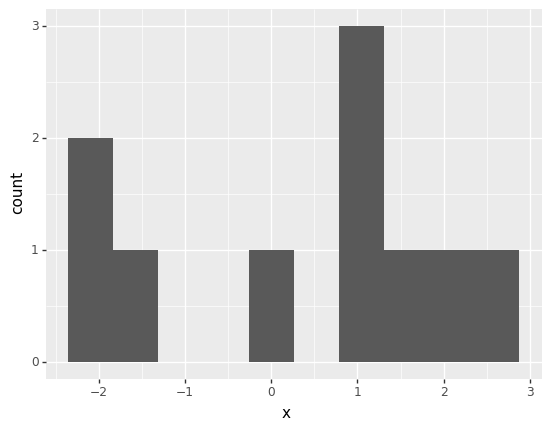

<ggplot: (-9223371900416276024)>

In [10]:
np.random.seed(8)

# Drawing 10 samples from a standard normal distribution
samples = np.random.normal(loc=0, scale=1, size=10)
print(samples)

# This is also called standard normal
df = DataFrame({'x':samples})
print("The mean and sd estimators over 10 samples drawn from a standard normal " +
      "distribution were: mu={}, sigma={}".format(round(df['x'].mean(),2), round(df['x'].std(), 2)))
ggplot(df) + aes(x='x') + geom_histogram(bins=10)




s=100, mu=0.06, distance from real=0.003596
s=1000, mu=0.025, distance from real=0.000629
s=10000, mu=-0.007, distance from real=4.8e-05
s=100000, mu=-0.002, distance from real=5e-06


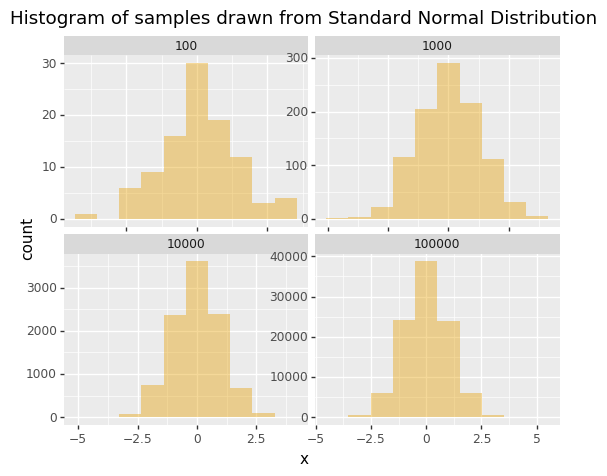

<ggplot: (136438208299)>

In [11]:
sizes, mu = [int(10e1), int(10e2), int(10e3), int(10e4)], 0

# A pandas DataFrame is a table consisting of rows and columns, where each column can store data of different types
# Here we create a DataFrame with two columns: x,g. `g` represents a group and `x` represents values of samples in 
# the group.
df = pd.concat([DataFrame({'x':np.random.normal(loc=mu, scale=1, size=s), 
                           'g':np.repeat(s, s)}) for s in sizes])

# Next we plot a histogram of the drawn values. The `facet_wrap` function creates a different graph
# for each group of values that share the same `g`
p = ggplot(df, aes(x='x')) + geom_histogram(bins=10, fill="#E69F00", alpha=.4) + \
    facet_wrap('~g', scales="free") + \
    ggtitle("Histogram of samples drawn from Standard Normal Distribution")

for s in sizes:
    print("s={}, mu={}, distance from real={}"
          .format(s, round(df.loc[df.g == s,"x"].mean(),3), round((df.loc[df.g == s,"x"].mean()-mu)**2, 6)))
p

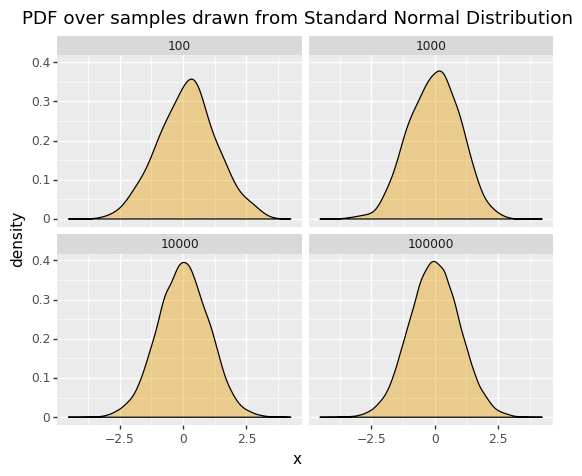

<ggplot: (136438608830)>

In [12]:
# Now, instead of plotting a histogram we plot the Probability Density Function (PDF) using geom_density 
sizes, mu = [int(10e1), int(10e2), int(10e3), int(10e4)], 0
df = pd.concat([DataFrame({'x':np.random.normal(loc=mu, scale=1, size=s), 
                           'g':np.repeat(s, s)}) for s in sizes])
ggplot(df, aes(x='x')) + geom_density(fill="#E69F00", alpha=.4) + facet_wrap('~g') + \
    ggtitle("PDF over samples drawn from Standard Normal Distribution")


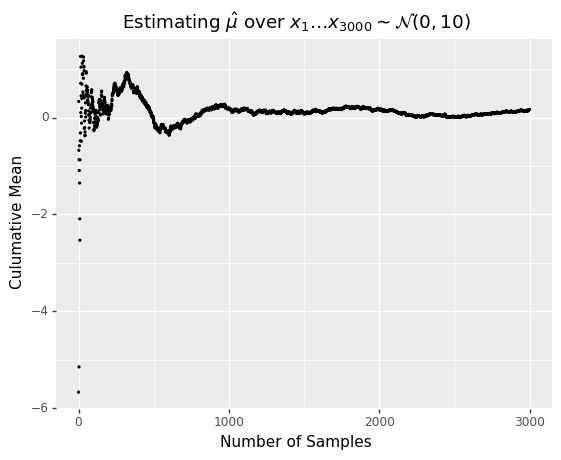

<ggplot: (136439731113)>

In [13]:
# Lastly let us calculate an estimator of the expectation based on a growing number of samples. 
# We begin with drawing n samples from a normal distribution. Then for any i<=n we calculate the mean value of
# all samples x_1,...,x_i. That is: cumulative_mean[j] holds mean(x_1,...,x_j)
mu, sigma, n = 0, 10, 3000
x = np.random.normal(mu, sigma, n)
cumulative_mean = x.cumsum()/np.arange(1, n+1)
ggplot(DataFrame({'x':range(n), 'y':cumulative_mean})) + \
    geom_point(aes(x='x', y='y'), size=0.3) + \
    labs(x="Number of Samples", y="Culumative Mean") + \
    ggtitle(r"Estimating $\hat{{\mu}}$ over $x_1\ldots x_{{{0}}}\sim\mathcal{{N}}\left( {1},{2} \right)$".format(n, mu, sigma))


In [14]:
def exp_pdf(lam, n):
    """
    Plot the PDF of n samples drawn from the exponential distribution.
    :param lam: The exponent's parameter
    :param n: Number of samples
    :return: ggplot object
    """
    pass

def exp_cdf(lam, n):
    """
    Plot the CDF of n samples drawn from the exponential distribution.
    Hint: check the stat_ecdf function.
    :param lam: The exponent's parameter
    :param n: Number of samples
    :return: ggplot object
    """
    pass

def estimate_var(lam, n):
    """
    Plot the estimated variance for all 1<m<=n. 
    Hint: the variance estimator is calculated as: (1/(m-1))(sum i=1 to m ((x_i - E(x_1,...,x_m))**2))
    Hint 2: What should be the variance for exp(lam)? Did you get the same?
    :param lam: The exponent's parameter
    :param n: Number of samples
    :return: ggplot object 
    """
    pass

    
[exp_pdf(.1,3000), exp_cdf(.1,3000), estimate_var(.1 ,3000)]

[None, None, None]